In [1]:
%config IPCompleter.use_jedi = False

In [2]:
from scipy.io import mmread

import matplotlib.pyplot as plt
from itertools import permutations
import numpy as np

import queue
import time
import random
import math
import os

In [3]:
def normalize(mat):
    dim = len(mat)
    for i in range(dim):
        for j in range(dim):
            mat[i][j] = 0.0 if mat[i][j] == 0 else 1.0
            
def calculate_bandwidth(mat, sol):
    dim = len(mat)
    bandwidth = 0
    for i in range(dim):
        for j in range(dim):
            if mat[i][j] != 0.0:
                bandwidth = max(bandwidth, abs(sol[i] - sol[j]))
    return bandwidth

def solution_matrix(mat, sol):
    dim = len(mat)
    mat2 = np.zeros((dim, dim))
    for i in range(dim):
        for j in range(dim):
            if mat[i][j] != 0:
                mat2[sol[i]][sol[j]] = 1
    return mat2

def load_from_mtx(filename):
    mat = mmread(filename).toarray()
    normalize(mat)
    return mat

In [4]:
def save_to_internal_format(in_name, out_name):
    mat = load_from_mtx(in_name)
    
    dim = len(mat)
    mat2 = [[0] for i in range(dim)]
    for i in range(dim):
        for j in range(dim):
            if mat[i][j] != 0:
                mat2[i].append(j)
                mat2[i][0] += 1
                
    for row in mat2:
        for i in range(len(row)):
            row[i] = str(row[i])
    with open(out_name, 'w') as f:
        f.write(str(dim) + '\n')
        for i in range(dim):
            line = ' '.join(mat2[i])
            line += '\n'
            f.write(line)

In [5]:
def convert_matrices(in_path, out_path):
    files = os.listdir(in_path)
    
    for i in range(len(files)):
        save_to_internal_format(os.path.join(in_path, files[i]), os.path.join(out_path, files[i][:files[i].rfind('.')]+'.txt'))

In [6]:
def load_from_internal(filename):
    mat =[]
    with open(filename, 'r') as f:
        n = int(f.readline())
        mat = np.zeros((n, n))
        for i in range(n):
            row = f.readline().split(' ')
            row = row[1:]
            row = [int(element) for element in row]
            for node in row:
                mat[i][node] = 1.0
    return mat

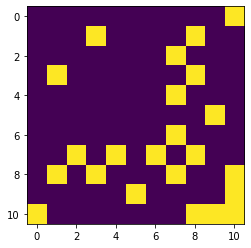

In [7]:
plt.imshow(load_from_internal('data/generated/graph_11_1.txt'))

In [8]:
def load_results_for_generated(filename):
    with open(filename, 'r') as f:
        f.readline()
        sa = f.readline().split(' ')
        sa = [int(element) for element in sa]
        
        brute = f.readline().split(' ')
        brute = [int(element) for element in brute]
        
        bfs = f.readline().split(' ')
        bfs = [int(element) for element in bfs]
        
        return (sa, brute, bfs)

In [9]:
def show_results_for_generated(mat_file, res_file):
    mat = load_from_internal(mat_file)
    sa, brute, bfs = load_results_for_generated(res_file)
    
    dim = len(mat)
    default_sol = list(range(dim))
    
    fig = plt.figure(figsize=(16,16))
    rows=1
    cols=4
    
    fig.add_subplot(rows,cols,1)
    plt.imshow(mat)
    plt.title(f'Initial, b:{calculate_bandwidth(mat, default_sol)}')
    
    mat2 = solution_matrix(mat, sa)
    fig.add_subplot(rows,cols,2)
    plt.imshow(mat2)
    plt.title(f'SA, b:{calculate_bandwidth(mat, sa)}')
    
    mat3 = solution_matrix(mat, brute)
    fig.add_subplot(rows,cols,3)
    plt.imshow(mat3)
    plt.title(f'Brute, b:{calculate_bandwidth(mat, brute)}')
    
    mat4 = solution_matrix(mat, bfs)
    fig.add_subplot(rows,cols,4)
    plt.imshow(mat4)
    plt.title(f'BFS, b:{calculate_bandwidth(mat, bfs)}')

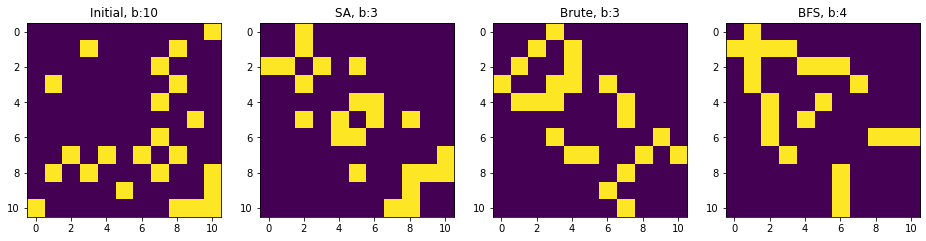

In [11]:
show_results_for_generated('data/generated/graph_11_1.txt', 'results/examples/graph11.txt')

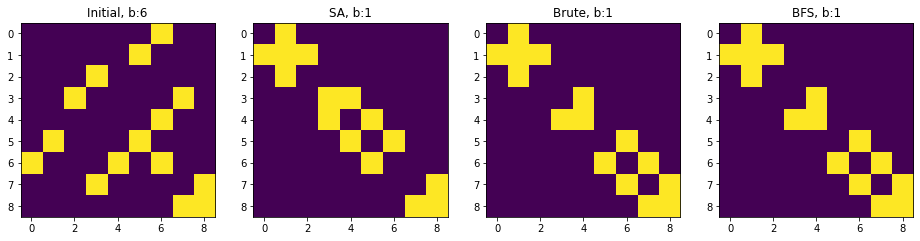

In [12]:
show_results_for_generated('data/generated/graph_9_1.txt', 'results/examples/graph9.txt')

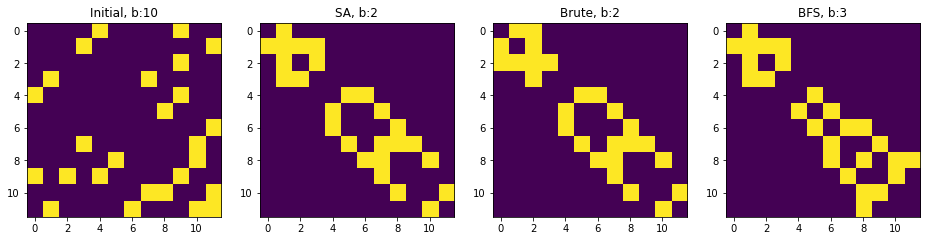

In [13]:
show_results_for_generated('data/generated/graph_12_1.txt', 'results/examples/graph12.txt')

In [14]:
def load_results_for_hb(filename):
    with open(filename, 'r') as f:
        f.readline()
        sa = list(map(lambda x: int(x), f.readline().split(' ')))
        sa_hist = list(map(lambda x: (float(x.split(',')[0]), int(x.split(',')[1])), f.readline().split(' ')))
        
        sa_bfs = list(map(lambda x: int(x), f.readline().split(' ')))
        sa_bfs_hist = list(map(lambda x: (float(x.split(',')[0]), int(x.split(',')[1])), f.readline().split(' ')))
        
        bfs = list(map(lambda x: int(x), f.readline().split(' ')))
        
        return (sa,sa_hist,sa_bfs,sa_bfs_hist,bfs)

In [15]:
def show_results_for_hb(mat_file, res_file):
    mat = load_from_mtx(mat_file)
    sa,sa_hist, sa_bfs,sa_bfs_hist, bfs = load_results_for_hb(res_file)
    
    dim = len(mat)
    default_sol = list(range(dim))
    
    fig = plt.figure(figsize=(16,16))
    rows=3
    cols=3
    
    name = ['SA', 'SA_BFS', 'BFS']
    solution = [sa, sa_bfs, bfs]
    history = [sa_hist, sa_bfs_hist]
    
    
    for i in range(rows):
        fig.add_subplot(rows,cols,i*rows + 1)
        plt.imshow(mat)
        plt.title(f'Initial, b:{calculate_bandwidth(mat, default_sol)}')
        
        mat2 = solution_matrix(mat, solution[i])
        fig.add_subplot(rows,cols,i * rows + 2)
        plt.imshow(mat2)
        plt.title(f'{name[i]}, b:{calculate_bandwidth(mat, solution[i])}')
        
        if i == len(history):
            break
            
        xs = [point[0] for point in history[i]]
        ys = [point[1] for point in history[i]]
        fig.add_subplot(rows,cols,i * rows + 3)
        plt.plot(xs, ys)
        plt.title(f'{name[i]} history')
        plt.xlabel('time (s)')
        plt.ylabel('bandwidth')
    

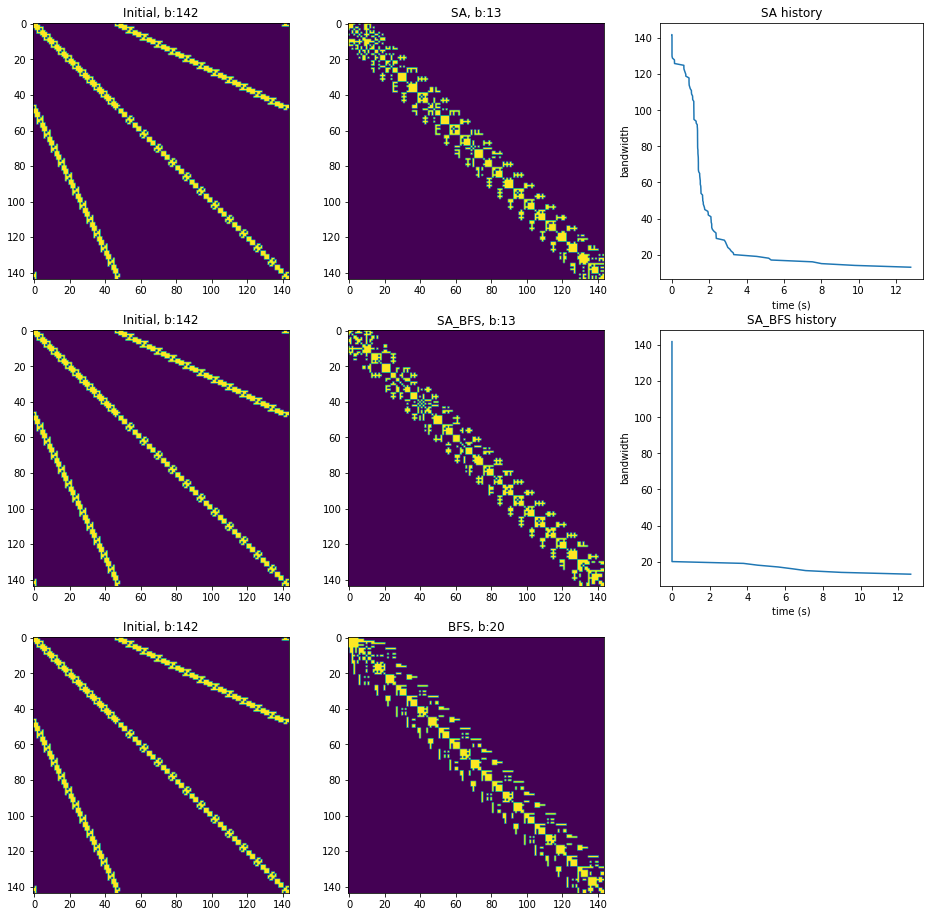

In [17]:
show_results_for_hb('data/mtx/can__144.mtx', 'results/examples/can144sol.txt')

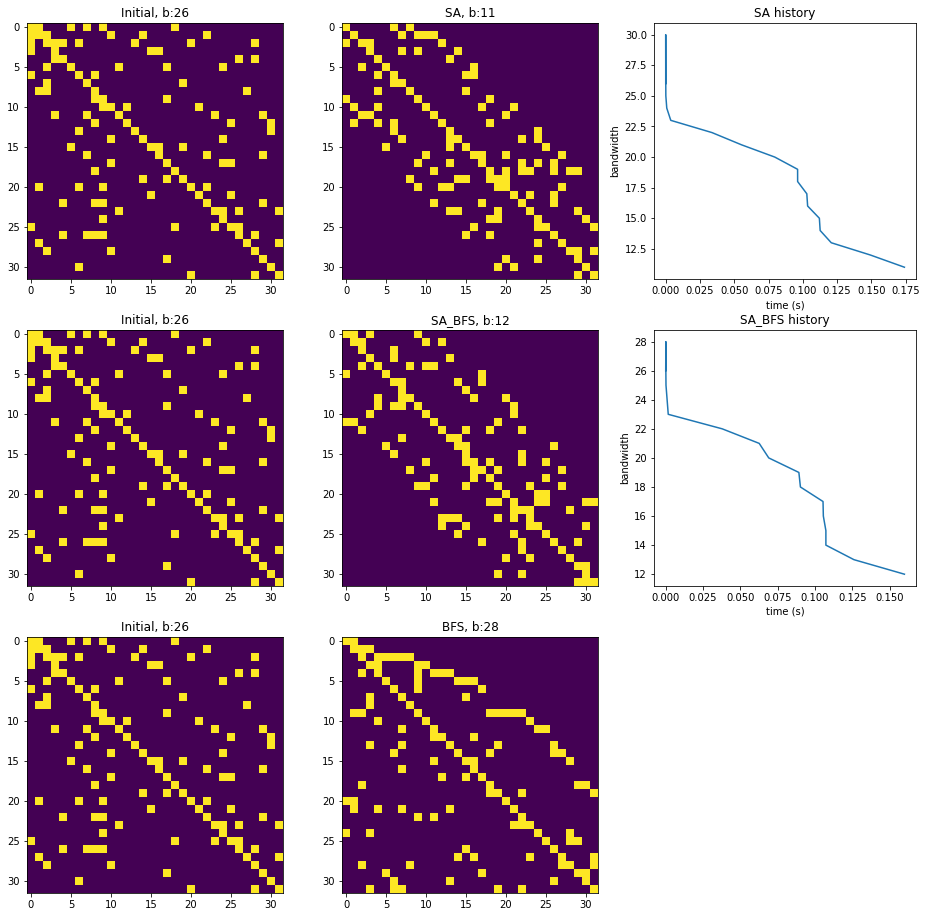

In [18]:
show_results_for_hb('data/mtx/ibm32.mtx', 'results/examples/ibm32sol.txt')

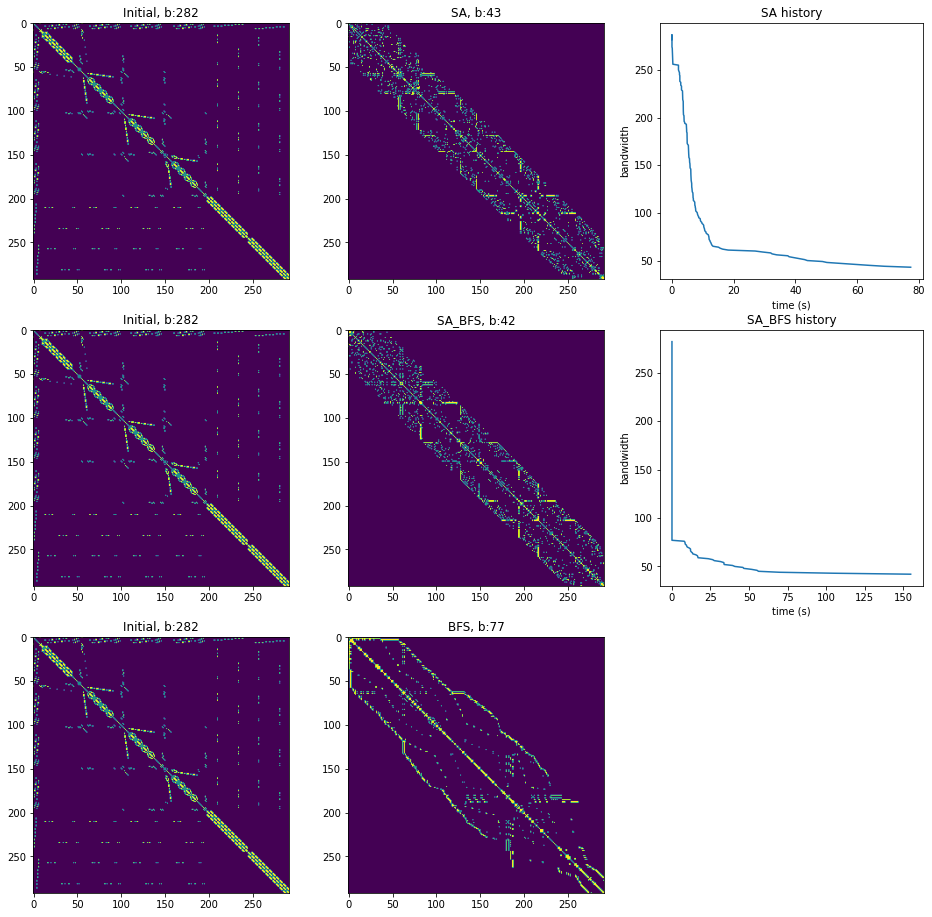

In [19]:
show_results_for_hb('data/mtx/can__292.mtx', 'results/examples/can292sol.txt')

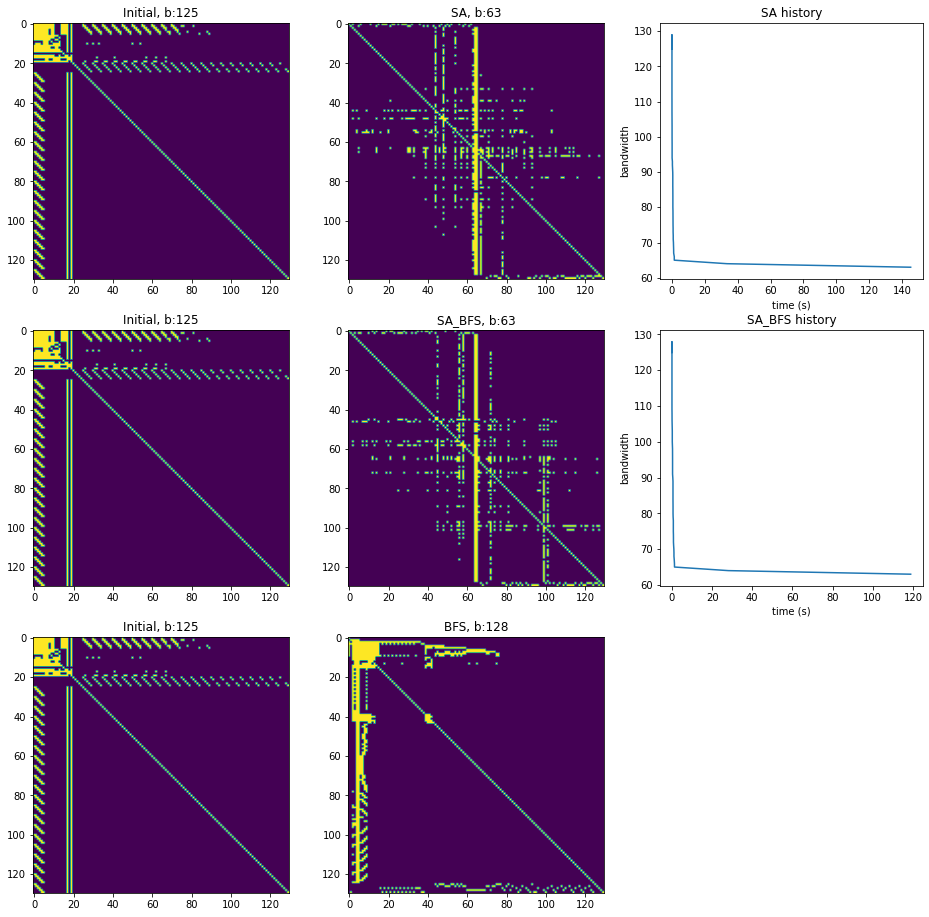

In [20]:
show_results_for_hb('data/mtx/arc130.mtx', 'results/examples/arc130sol.txt')

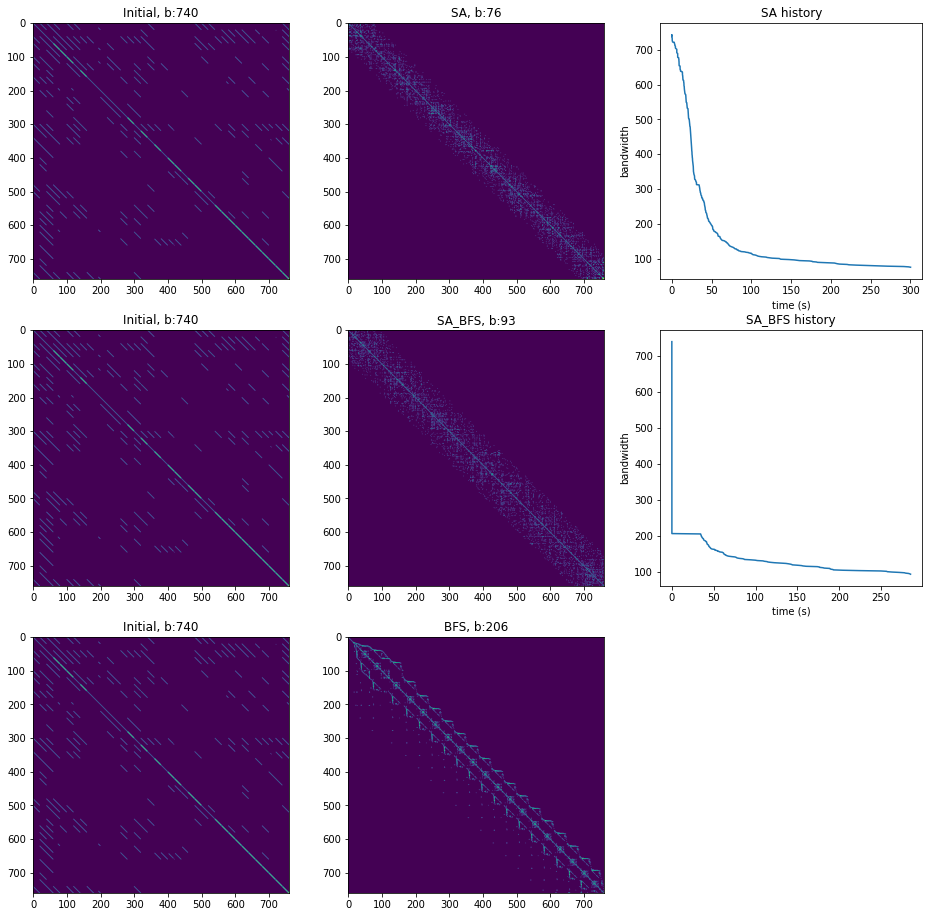

In [22]:
show_results_for_hb('data/mtx/fs_760_1.mtx', 'results/examples/fs760sol.txt')

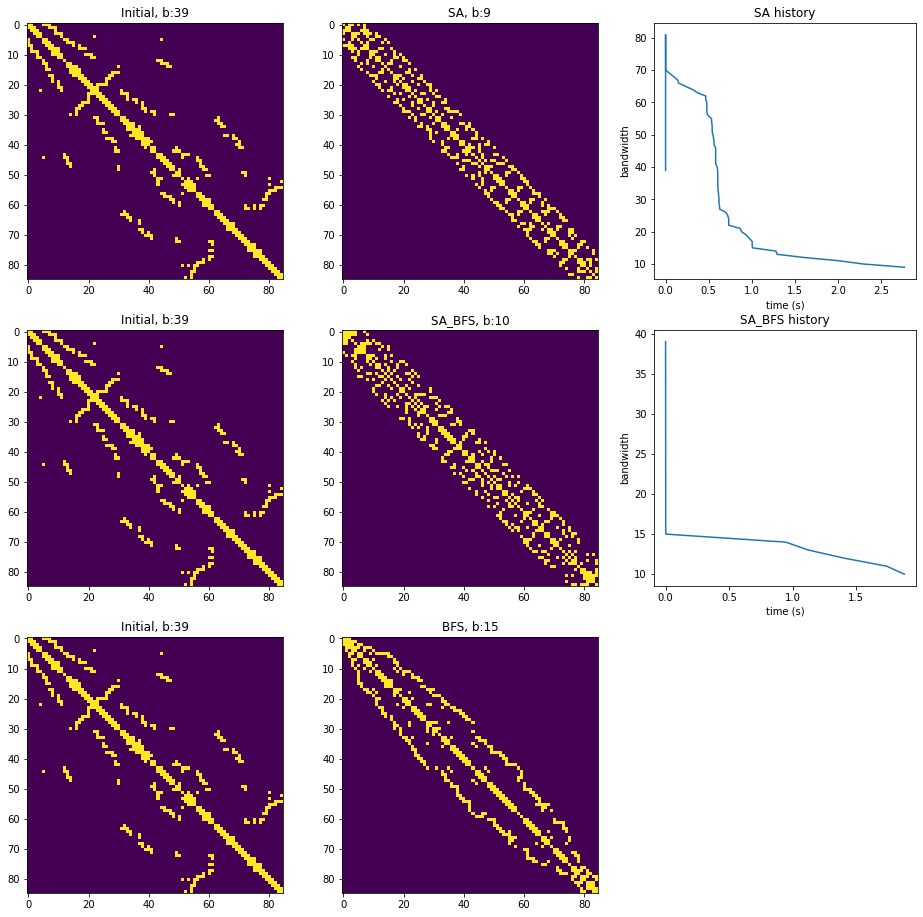

In [23]:
show_results_for_hb('data/mtx/ash85.mtx', 'results/examples/ash85sol.txt')

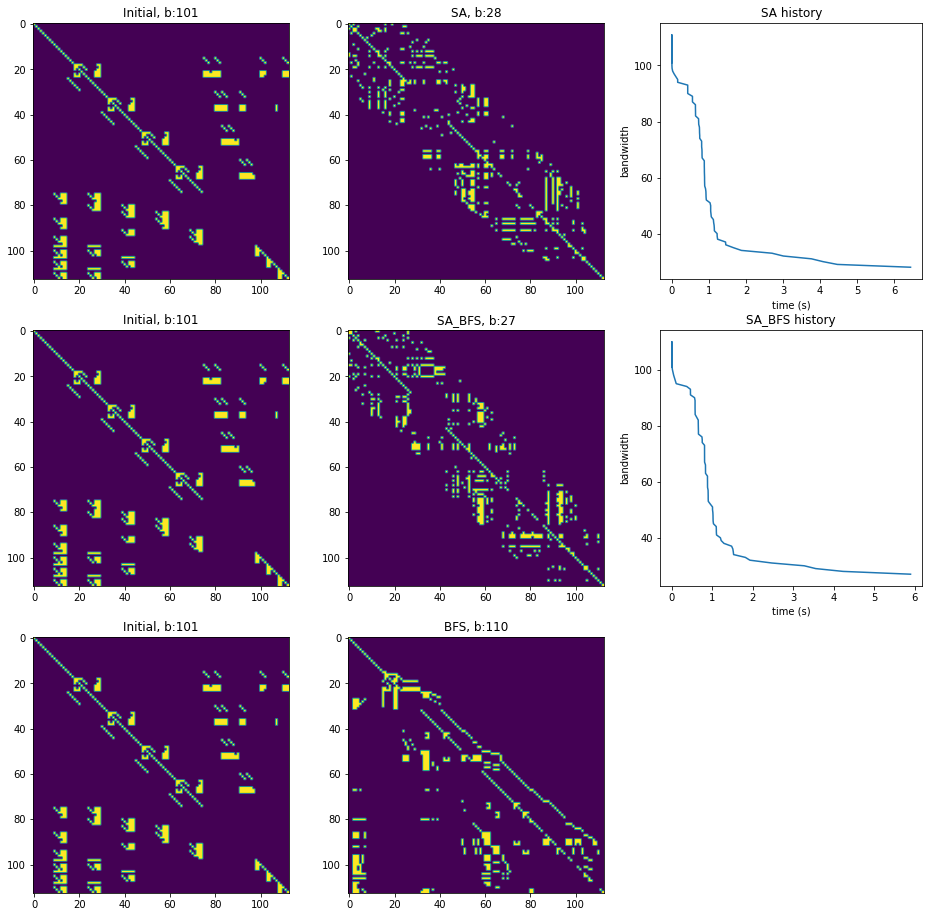

In [24]:
show_results_for_hb('data/mtx/gent113.mtx', 'results/examples/gent113sol.txt')

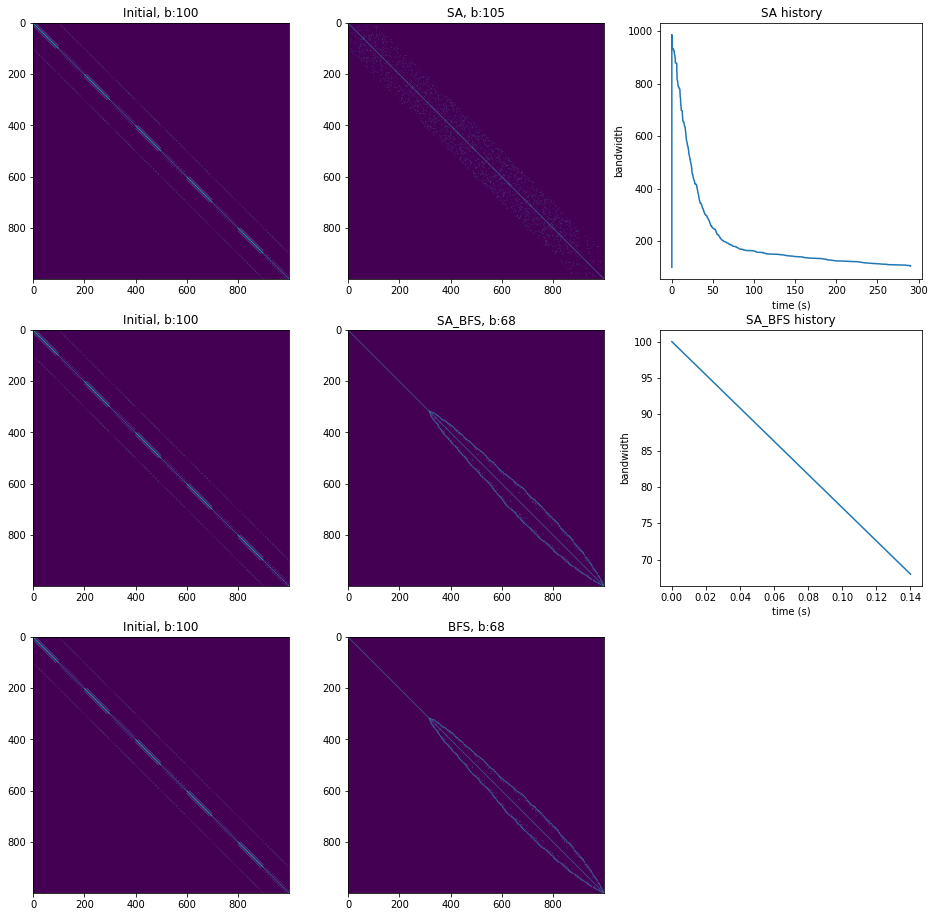

In [25]:
show_results_for_hb('data/mtx/sherman1.mtx', 'results/examples/sherman1sol.txt')

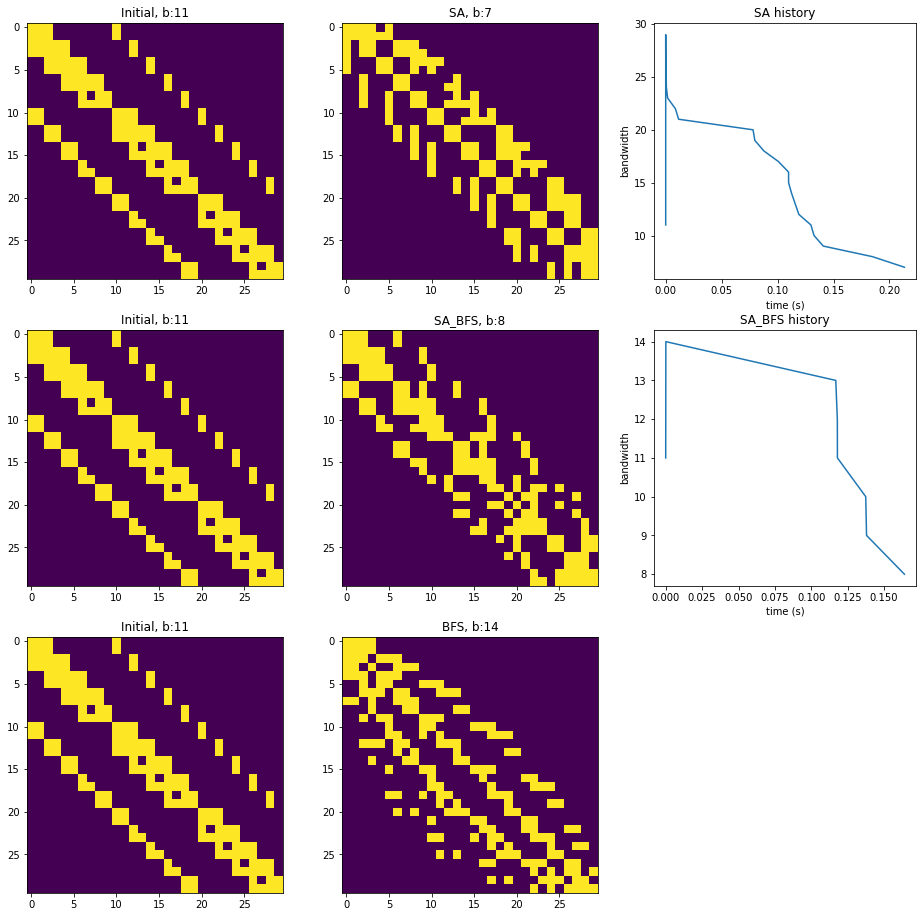

In [26]:
show_results_for_hb('data/mtx/pores_1.mtx', 'results/examples/pores1sol.txt')